# Getting Sentiments from IMDB Dataset without RNN

In [1]:
import tensorflow as tf
print(tf.__version__)


# !pip install tensorflow==2.0.0


# tf.enable_eager_execution()  # requires when tensorflow version < 2.0.0 is used

2.0.0


## Download IMDB Dataset

In [2]:
import tensorflow_datasets as tfds

imdb_data, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


## Convert Train & Test Dataset into Numpy Array

In [0]:
import numpy as np

#Split dataset into training and test
train_data, test_data = imdb_data['train'], imdb_data['test']


training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []


for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


## Macros Definition

In [0]:
VOCAB_SIZE = 10000   # Limit the vocabulary size to 10000
EMBEDDING_DIM = 16
MAX_LENGTH = 120     # Limit the maximum length of sentence to 120 characters
TRUNC_TYPE = 'post'  # truncate/cut from the back of review post a defined length
OOV_TOK = "<OOV>"    # Out of vocabulary (OOV) for undefined tokens

## Convert Dataset / Sentences into tokens 

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# create instance of Tokenizer. Since "<OOV>" is just a simple string. So you can use any unique string instead of this
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOK)

tokenizer.fit_on_texts(training_sentences)  # encode the passed data
word_index = tokenizer.word_index           # convert sentence to a dictionary of word tokens

sequences = tokenizer.texts_to_sequences(training_sentences)    # convert each sentence to lists of tokens
padded = pad_sequences(sequences, maxlen=MAX_LENGTH, truncating=TRUNC_TYPE) # append/pad zeroes to make all sentences token list to same size

print("\nTotal tokens = ", len(word_index))
print("\nTotal tokens = ", word_index)
print("\nTraining sentence = ", training_sentences[0])
print("\nSequence = " , sequences[0])
print("\nPadded Sequence:\n", padded[0])

# Tokenize Test dataset
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)   # convert each sentence to lists of tokens
print("\nTest Sequence = ", testing_sequences[0])

testing_padded = pad_sequences(testing_sequences,maxlen=MAX_LENGTH)   # append/pad zeroes to make all sentences token list to same size




Total tokens =  86539

Total tokens =  {'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, "'s": 21, 'on': 22, 'you': 23, 'not': 24, 'are': 25, 'his': 26, 'he': 27, 'have': 28, 'be': 29, 'one': 30, 'all': 31, 'at': 32, 'by': 33, 'they': 34, 'an': 35, 'who': 36, 'so': 37, 'from': 38, 'like': 39, 'her': 40, "'t": 41, 'or': 42, 'just': 43, 'there': 44, 'about': 45, 'out': 46, "'": 47, 'has': 48, 'if': 49, 'some': 50, 'what': 51, 'good': 52, 'more': 53, 'very': 54, 'when': 55, 'she': 56, 'up': 57, 'can': 58, 'b': 59, 'time': 60, 'no': 61, 'even': 62, 'my': 63, 'would': 64, 'which': 65, 'story': 66, 'only': 67, 'really': 68, 'see': 69, 'their': 70, 'had': 71, 'were': 72, 'me': 73, 'well': 74, 'we': 75, 'than': 76, 'much': 77, 'been': 78, 'get': 79, 'bad': 80, 'will': 81, 'people': 82, 'do': 83, 'also': 84, 'other': 85, 'into': 86, 'bec

## Visually Compare training sentence with the decoded sentence

In [19]:
# Reverse the Key value pair so that the actual word becomes the key and number becomes the value
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(reverse_word_index)

def decode_review(text):
  """
  Join the dictionary values to make a full sentence
  """
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[0]))
print(training_sentences[0])

{1: '<OOV>', 2: 'the', 3: 'and', 4: 'a', 5: 'of', 6: 'to', 7: 'is', 8: 'br', 9: 'in', 10: 'it', 11: 'i', 12: 'this', 13: 'that', 14: 'was', 15: 'as', 16: 'for', 17: 'with', 18: 'movie', 19: 'but', 20: 'film', 21: "'s", 22: 'on', 23: 'you', 24: 'not', 25: 'are', 26: 'his', 27: 'he', 28: 'have', 29: 'be', 30: 'one', 31: 'all', 32: 'at', 33: 'by', 34: 'they', 35: 'an', 36: 'who', 37: 'so', 38: 'from', 39: 'like', 40: 'her', 41: "'t", 42: 'or', 43: 'just', 44: 'there', 45: 'about', 46: 'out', 47: "'", 48: 'has', 49: 'if', 50: 'some', 51: 'what', 52: 'good', 53: 'more', 54: 'very', 55: 'when', 56: 'she', 57: 'up', 58: 'can', 59: 'b', 60: 'time', 61: 'no', 62: 'even', 63: 'my', 64: 'would', 65: 'which', 66: 'story', 67: 'only', 68: 'really', 69: 'see', 70: 'their', 71: 'had', 72: 'were', 73: 'me', 74: 'well', 75: 'we', 76: 'than', 77: 'much', 78: 'been', 79: 'get', 80: 'bad', 81: 'will', 82: 'people', 83: 'do', 84: 'also', 85: 'other', 86: 'into', 87: 'because', 88: 'great', 89: 'first', 90:

## Create and Compile the Model

In [28]:
model = tf.keras.Sequential([
    # Embeddings layer is the main layer that finds the relationship between different words and 
    # place the words near to each other  that have similar meanings. For example movie review like
    # funny and hilarious have similar meanings and so will be placed near to each other.
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LENGTH),
    tf.keras.layers.Flatten(),
    # It is faster and simpler in comparison to Flatten(), But Flatten is more accurate
    # tf.keras.layers.GlobalAveragePooling1D(), # Average across the vector to flatten it out
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


## Train the Model 
We can see by result that it is Overfitting

In [29]:
NUM_EPOCHS = 10
history = model.fit(padded, training_labels_final, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 225us/sample - loss: 0.4944 - accuracy: 0.7398 - val_loss: 0.3454 - val_accuracy: 0.8497
Epoch 2/10
25000/25000 [==============================] - 5s 202us/sample - loss: 0.2432 - accuracy: 0.9044 - val_loss: 0.3722 - val_accuracy: 0.8369
Epoch 3/10
25000/25000 [==============================] - 5s 200us/sample - loss: 0.0983 - accuracy: 0.9744 - val_loss: 0.4491 - val_accuracy: 0.8264
Epoch 4/10
25000/25000 [==============================] - 5s 199us/sample - loss: 0.0261 - accuracy: 0.9964 - val_loss: 0.5169 - val_accuracy: 0.8271
Epoch 5/10
25000/25000 [==============================] - 5s 200us/sample - loss: 0.0064 - accuracy: 0.9995 - val_loss: 0.5868 - val_accuracy: 0.8272
Epoch 6/10
25000/25000 [==============================] - 5s 199us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.6379 - val_accuracy: 0.8269
Epoch 7/10
25000/25000 [==========================

## Plot Accuacy and Loss Graph

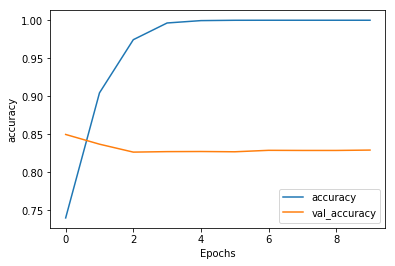

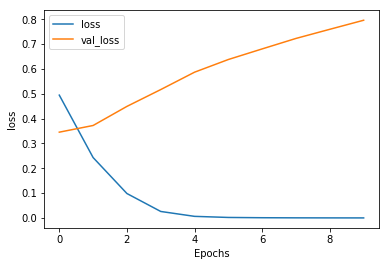

In [31]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Fetch the weights and shape of Embedding Layer (Layer 0)
We have a total of 10000 words and 16 dimension array

In [23]:
emb_layer = model.layers[0]     # Get Embedding Layer (Layer 0)
weights = emb_layer.get_weights()[0]    # Get weights of Embedding layer (Layer 0)
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


## Save Vector & meta information

In [0]:
import io

# create & Open files in write mode 
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, VOCAB_SIZE):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
  
out_v.close()
out_m.close()

## Download the created files to PC/Laptop
Use the downloaded file on https://projector.tensorflow.org/

Directly download files if the below code fails

In [27]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

MessageError: ignored

In [11]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1430], [968], [4], [1540], [1540], [4740], [], [790], [2010], [11], [2927], [2192], [], [790], [2010], [11], [579], [], [11], [579], [], [4], [1780], [4], [4506], [11], [2927], [1276], [], [], [2010], [1005], [2927], [968], [579], [790], []]
